In [1]:
# import libraries
import pandas as pd
import math

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine.isnull().sum() # check for null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

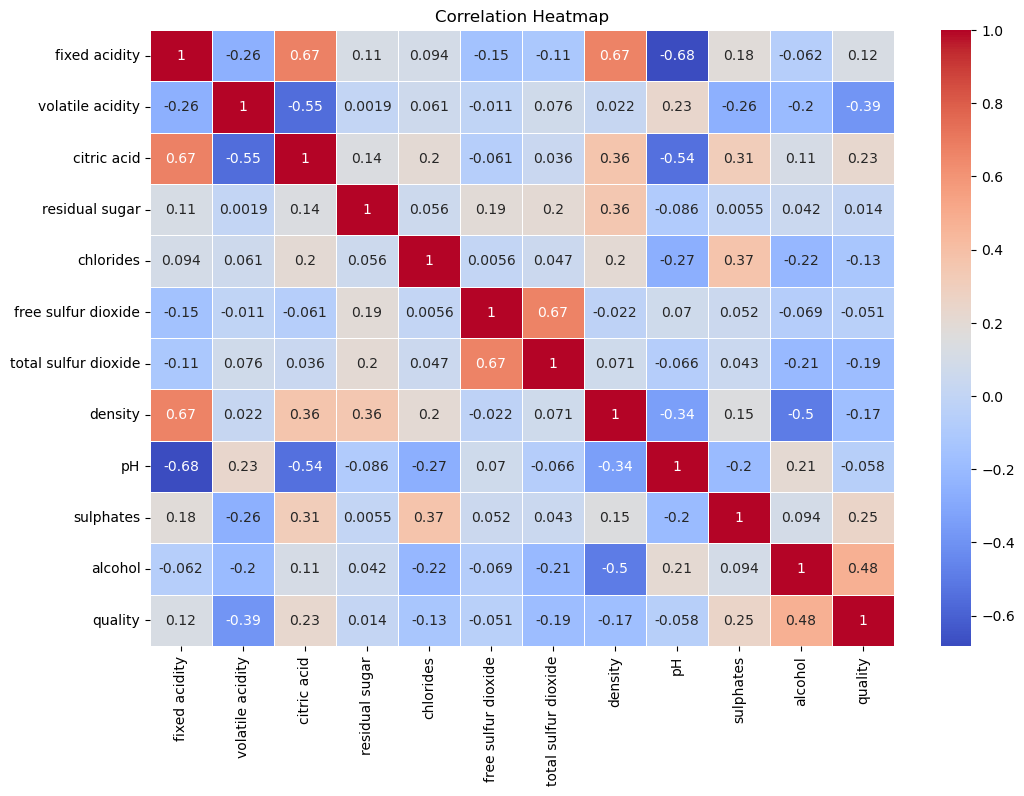

In [4]:
# Checking for multi-colinearity
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = wine.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# no significant multi-colinearity found


In [5]:
#Spliting the data into X and Y
X = wine.drop(['quality'], axis = 1)
Y = wine[['quality']]

In [6]:
#Dividing the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)
len(X_train), len(X_test), len(Y_train), len(Y_test)

(1279, 320, 1279, 320)

In [7]:
#Creating the model using on the training data set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#Fit the model object into training data to build a model
model=lr.fit(X_train, Y_train)
model

LinearRegression()

Find the values of slope, intercept and R Square (Applicable only when we build Regression based model) For linear model R-sq >=75

In [8]:
# To calculate the slope 
model.coef_

array([[ 2.81839730e-02, -1.09837176e+00, -7.57683189e-02,
         9.54728914e-04, -1.42628148e+00,  5.92874659e-03,
        -3.98229819e-03, -1.70045912e+01, -3.64250909e-01,
         9.52770205e-01,  2.49849441e-01]])

In [9]:
# To calculate constant
model.intercept_

array([21.13551502])

In [10]:
# To calculate the R-sq value for model
rsq = model.score(X_train, Y_train)
rsq

0.36142429747216853

In [11]:
Y_test['predicted'] = model.predict(X_test)
Y_test

,quality,predicted
1429,5,6.580692
260,5,5.601283
916,5,5.160790
1141,6,6.099272
1574,6,5.467738
...,...,...
755,6,5.093622
707,5,5.567064
863,5,4.998903
1187,6,5.903857


In [12]:
# Step 7: Calculate the RMSE value from test data. RMSE - Root <- Mean <- Square <- Error
Y_test['error'] = Y_test['quality'] - Y_test['predicted']
Y_test['sq-error'] = (Y_test['quality'] - Y_test['predicted']) **2

Error_mean = Y_test['sq-error'].mean()
Error_mean #This is mean of sq_Error

#Find the root of Error mean -> RMSE

RMSE = math.sqrt(Error_mean)
RMSE

0.6837468955719058

 for a linear regression model to be considered good we should have RMSE as low as possible and R-sq as high as possible 
### in this example this requirement is not satisfied 
## hence we can conclude that Linear Regression is not a good model to predict wine quality with this data
### Also we observe that the predicted value is a continuous value where as the quality is actually a categorical data . this mismatch is due to the fact that regression will always give a continuous output, if we need a categorical output a classification model would have been a better fit